# Imports

In [20]:
import pandas as pd
import numpy as np
import sys

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Load Data 

In [21]:
df = pd.read_csv('./datasets/titanic/train.csv')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Data

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df = df.drop('Cabin', axis=1)
df.shape

(891, 11)

In [25]:
df = df.dropna()
df.shape

(712, 11)

# Plot Data

In [26]:
X = df.copy()
X = X.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [27]:
male_surv = len(X[(X.Sex == 'male') & (X.Survived == 1)])
male_dead = len(X[(X.Sex == 'male') & (X.Survived == 0)])
female_surv = len(X[(X.Sex == 'female') & (X.Survived == 1)])
female_dead = len(X[(X.Sex == 'female') & (X.Survived == 0)])

male_s_rate = male_surv / float(male_surv + male_dead)
female_s_rate = female_surv / float(female_surv + female_dead)

print(female_s_rate, male_s_rate) 

0.752895752895753 0.2052980132450331


### Age Distribution (Within Genders)

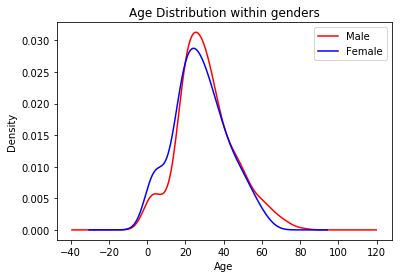

In [38]:
% matplotlib inline 

colors = ['r', 'b', 'g']

df.Age[df.Sex == 'male'].plot(kind='kde', color=colors[0])    
df.Age[df.Sex == 'female'].plot(kind='kde', color=colors[1])

plt.xlabel("Age")    
plt.title("Age Distribution within genders")
plt.legend(('Male', 'Female'),loc='best')

### Age Distribution (Within Classes)

AttributeError: module 'matplotlib.pyplot' has no attribute 'dflabel'

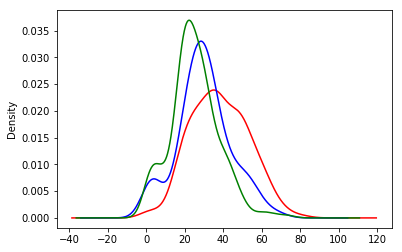

In [39]:
df.Age[df.Pclass == 1].plot(kind='kde', color=colors[0])
df.Age[df.Pclass == 2].plot(kind='kde', color=colors[1])
df.Age[df.Pclass == 3].plot(kind='kde', color=colors[2])

plt.dflabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('First', 'Second', 'Third'),loc='best')

### Age Distribution (among those who survived and those who did not)

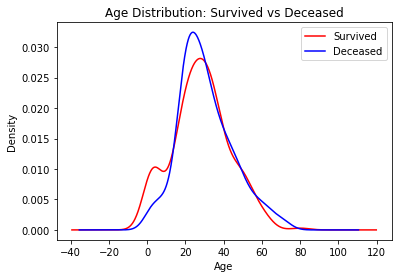

In [30]:
X.Age[X.Survived == 1].plot(kind='kde', color=colors[0])
X.Age[X.Survived == 0].plot(kind='kde', color=colors[1])

plt.xlabel("Age")    
plt.title("Age Distribution: Survived vs Deceased")
plt.legend(('Survived', 'Deceased'),loc='best')

# Clean Data

In [31]:
X = X.dropna(axis=0)
y = X.Survived
X = X.drop('Survived', axis=1)

# Encode Categorical Features

In [32]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])

# Scripts

In [33]:
def eval_models(models, X, y):
    X_train, X_test, y_train, y_test = get_train_test_split(X, y)
    
    ret = []
    print_status_bar(len(models), len(ret))
    
    for name, model in models:
        precision, recall, f1 = train_and_get_scores(model, X_train, y_train, X_test, y_test)
        ret.append({'Precision': precision, 'Recall': recall, 'F1_Score': f1, 'Classifier': name})
        print_status_bar(len(models), len(ret))
    print('\n')
    
    return ret

def get_train_test_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

def train_and_get_scores(model, X_train, y_train, X_test, y_test, verbose=False):
    model = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    prec = precision_score(y_test, y_pred)
    recl = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return prec, recl, f1
    
    
def print_status_bar(bar_length, filled_length):
    bar = '=' * filled_length + '-' * (bar_length - filled_length)
    sys.stdout.write('\r[%s]' % bar)
    sys.stdout.flush()

# Models Under Evaluation

In [34]:
gbm1 = GradientBoostingClassifier(loss='exponential',
                                  learning_rate=0.01,
                                  n_estimators=1000,
                                  max_depth=4)

gbm2 = GradientBoostingClassifier(loss='deviance',
                                  learning_rate=0.01,
                                  n_estimators=2000,
                                  max_depth=3)

gbm3 = GradientBoostingClassifier(loss='deviance',
                                  learning_rate=0.01,
                                  n_estimators=1000,
                                  max_depth=3)


models = [('LogisticRegression', LogisticRegression()), 
          ('LinearSVM', LinearSVC()), 
          ('SVC', SVC()),
          ('DecisionTreeClassifier', DecisionTreeClassifier()),
          ('RandomForestClassifier', RandomForestClassifier()),
          ('GradientBoostingClassifier1', gbm1),
          ('GradientBoostingClassifier2', gbm2),
          ('GradientBoostingClassifier3', gbm3)]

# Test

In [35]:
results_df = pd.DataFrame(eval_models(models, X, y))

[========]



In [36]:
results_df = results_df.sort_values('F1_Score')
results_df

,Classifier,F1_Score,Precision,Recall
1,LinearSVM,0.550336,0.820000,0.414141
2,SVC,0.594059,0.582524,0.606061
3,DecisionTreeClassifier,0.617801,0.641304,0.595960
4,RandomForestClassifier,0.715026,0.734043,0.696970
0,LogisticRegression,0.722513,0.750000,0.696970
7,GradientBoostingClassifier3,0.734043,0.775281,0.696970
5,GradientBoostingClassifier1,0.736842,0.769231,0.707071
6,GradientBoostingClassifier2,0.739583,0.763441,0.717172
